1. IMPORT AND INSTALL DEPENDENCIES

In [ ]:
%pip install tensorflow==2.13.0 tensorflow-gpu opencv-python scikit-learn matplotlib mediapipe

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
from matplotlib import pyplot as plt

2. MARKING KEYPOINTS USING MEDIAPIPE HOLISTIC

In [2]:
mp_holistic = mp.solutions.holistic     #Mediapipe Holistic Model
mp_drawing = mp.solutions.drawing_utils #Mediapipe Drawing Utilities

In [3]:
def mediapipe_detection(image, model) :
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      #Convert Image from BGR(Blue-Green-Red) to RGB(Red-Green-Blue)
  image.flags.writeable = False                       #Image is no longer writeable
  result = model.process(image)                       #Deploying mediapipe model to process landmarks
  image.flags.writeable = True                        #Changing image status to writeable
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)      #Converting Image from RGB back to BGR
  return image, result                                #Return result

In [4]:
def draw_landmarks(image, result) :
    mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1), 
                              mp_drawing.DrawingSpec(color = (80, 256, 121), thickness = 1, circle_radius = 1))  #Drawing Face Connections on Window
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  #Drawing Pose Connections on Window
    mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4), 
                              mp_drawing.DrawingSpec(color = (121, 44, 250), thickness = 2, circle_radius = 2))  #Drawing Left Hand Connections on Window 
    mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (245, 117, 66), thickness = 2, circle_radius = 4), 
                              mp_drawing.DrawingSpec(color = (245, 66, 230), thickness = 2, circle_radius = 2))  #Drawing Right Hand Connections on Window

In [5]:
#Open Camera
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic: #Instance of Mediapipe Holistic Model 
    while cap.isOpened():
        #Read frame
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) #Optional for fixing camera issues
        #Detecting Keypoints using Mediapipe detection function
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Rendering Detected Landmarks on Current Frame
        draw_landmarks(image, results)
        #Show on screen
        cv2.imshow('OpenCV Window', image)
        #Close Window
        if cv2.waitKey(10) & 0xFF== ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

3. EXTRACTING KEYPOINTS FROM LAST CAPTURED FRAME

In [6]:
def extract_keypoints(results) :
#Extracting Keypoints of Face Landmarks
    if results.face_landmarks :
        #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
        face = np.zeros(1404)
    else :
        face = np.zeros(1404)
    #Extracting Keypoints of Pose Landmarks
    if results.pose_landmarks :
        #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
        pose = np.zeros(132)
    else :
        pose = np.zeros(132)
    #Extracting Keypoints of Right Hand Landmarks
    if results.right_hand_landmarks :
        right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
    else :
        right_hand = np.zeros(63)
    #Extracting Keypoints of Left Hand Landmarks
    if results.left_hand_landmarks :
        left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
    else :
        left_hand = np.zeros(63)
    return np.concatenate([face, pose, right_hand, left_hand])

In [7]:
final_array = extract_keypoints(results)
print((final_array))
print(final_array.shape)

[0. 0. 0. ... 0. 0. 0.]
(1662,)


4. SETTING UP FOLDER FOR COLLECTING VIDEO DATA

In [8]:
DATA_PATH = os.path.join('ISL_Data') #Creating Folder for storing data in form of numpy array
actionset_1 = np.array(['0', '1', '2', '3', '4']) #List of action Part 1
actionset_2 = np.array(['5', '6', '7', '8', '9']) #List of action Part 2
actionset_3 = np.array(['A', 'B', 'C', 'D', 'E']) #List of action Part 3
actionset_4 = np.array(['F', 'G', 'H', 'I', 'J']) #List of action Part 4
actionset_5 = np.array(['K', 'L', 'M', 'N', 'O']) #List of action Part 5
actionset_6 = np.array(['P', 'Q', 'R', 'S', 'T']) #List of action Part 6
actionset_7 = np.array(['U', 'V', 'W']) #List of action Part 7
actionset_8 = np.array(['X', 'Y', 'Z']) #List of action Part 8
no_sequences = 30 #Number of Data item for each action 
sequence_length = 30 #Number of frames in each sequence
for action in actionset_1 : #Looping through each action in set1 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_2 : #Looping through each action in set2 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_3 : #Looping through each action in set3 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_4 : #Looping through each action in set4 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_5 : #Looping through each action in set5 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_6 : #Looping through each action in set6 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_7 : #Looping through each action in set7 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass
for action in actionset_8 : #Looping through each action in set8 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except :
            pass

In [9]:
#ADDING EXTRA DATA PATHS
DATA_PATH = os.path.join('ISL_Data') #Creating Folder for storing data in form of numpy array
actionset_1 = np.array(['0', '1', '2', '3', '4']) #List of action Part 1
actionset_2 = np.array(['5', '6', '7', '8', '9']) #List of action Part 2
actionset_3 = np.array(['A', 'B', 'C', 'D', 'E']) #List of action Part 3
actionset_4 = np.array(['F', 'G', 'H', 'I', 'J']) #List of action Part 4
actionset_5 = np.array(['K', 'L', 'M', 'N', 'O']) #List of action Part 5
actionset_6 = np.array(['P', 'Q', 'R', 'S', 'T']) #List of action Part 6
actionset_7 = np.array(['U', 'V', 'W']) #List of action Part 7
actionset_8 = np.array(['X', 'Y', 'Z']) #List of action Part 8
no_sequences = 30 #Number of Data item for each action 
sequence_length = 30 #Number of frames in each sequence
for action in actionset_1 : #Looping through each action in set1 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_2 : #Looping through each action in set2 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_3 : #Looping through each action in set3 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_4 : #Looping through each action in set4 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_5 : #Looping through each action in set5 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_6 : #Looping through each action in set6 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_7 : #Looping through each action in set7 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass
for action in actionset_8 : #Looping through each action in set8 and creating folders for storing data
    for sequence in range(no_sequences) :
        try :
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence+30)))
        except :
            pass

5. COLLECTING KEYPOINT VALUES FOR TRAINING AND TESTING PART - 1

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 1 [0, 1, 2, 3, 4]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_1 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 2 [5, 6, 7, 8, 9]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_2 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [25]:
#Open Camera
#Module for taking Input of Signs in Set 3 [A, B, C, D, E]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_3 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 4 [F, G, H, I, J]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_4 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 5 [K , L, M, N, O]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_5 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 6 [P, Q, R, S, T]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_6 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 7
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_7 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 8
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_8 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

6. COLLECTING KEYPOINT VALUES FOR TRAINING AND TESTING PART - 2

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 1 [0, 1, 2, 3, 4]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_1 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence+30), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#Open Camera
#Module for taking Input of Signs in Set 2 [5, 6, 7, 8, 9]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_2 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence+30), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

In [26]:
#Open Camera
#Module for taking Input of Signs in Set 3 [A, B, C, D, E]
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    for action in actionset_3 : #Looping through each action
        for sequence in range(no_sequences) : #Looping through each video/sequence
            for frame_no in range(sequence_length) : #Looping through each frame
              #Read frame
              ret, frame = cap.read()
              frame = cv2.flip(frame, 1) #Optional for fixing camera issues
              #Detecting Keypoints using Mediapipe detection function
              image, results = mediapipe_detection(frame, holistic)
              print(results)
              #Rendering Detected Landmarks on Current Frame
              draw_landmarks(image, results)
              #Logic for waiting between collection of frames
              if frame_no==0 :
                  cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                  cv2.waitKey(2000)
              else :
                  cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                              cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
              #Extracting and saving keypoints in Numpy Array
              keypoints = extract_keypoints(results)
              npy_path = os.path.join(DATA_PATH, action, str(sequence+30), str(frame_no))
              np.save(npy_path, keypoints)
              #Show on screen
              cv2.imshow('OpenCV Window', image)
              #Close Window
              if cv2.waitKey(10) & 0xFF== ord('q') :
                  break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

7. PREPROCESSING AND CREATING LABELS FOR COLLECTED DATA

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
actions = np.concatenate((actionset_1, actionset_2, actionset_3))
#actions = (actionset_1)
print(actions)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E']


In [12]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14}

In [13]:
sequences, labels = [], []
for action in actions :
    for sequence in range(no_sequences+30) :
        window = []
        for frame in range(sequence_length) :
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
X = np.array(sequences)
Y = to_categorical(labels).astype(int)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(855, 30, 1662)
(45, 30, 1662)
(855, 15)
(45, 15)


8. BUILDING AND TRAINING NEURAL NETWORK USING LSTM TECHNIQUE

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
log_dir = os.path.join("Logs")
tb_callbacks = TensorBoard(log_dir=log_dir)

In [18]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(512, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(x_train, y_train, epochs=300, callbacks=[tb_callbacks])

Epoch 1/300
27/27 [==============================] - 17s 363ms/step - loss: 2.7344 - categorical_accuracy: 0.0573
Epoch 2/300
27/27 [==============================] - 10s 362ms/step - loss: 2.7156 - categorical_accuracy: 0.0901
Epoch 3/300
27/27 [==============================] - 10s 369ms/step - loss: 2.6779 - categorical_accuracy: 0.1170
Epoch 4/300
27/27 [==============================] - 10s 365ms/step - loss: 2.5427 - categorical_accuracy: 0.1322
Epoch 5/300
27/27 [==============================] - 10s 368ms/step - loss: 2.3899 - categorical_accuracy: 0.1333
Epoch 6/300
27/27 [==============================] - 10s 370ms/step - loss: 2.2096 - categorical_accuracy: 0.1322
Epoch 7/300
27/27 [==============================] - 10s 371ms/step - loss: 2.4084 - categorical_accuracy: 0.1181
Epoch 8/300
27/27 [==============================] - 10s 370ms/step - loss: 2.3225 - categorical_accuracy: 0.1193
Epoch 9/300
27/27 [==============================] - 10s 370ms/step - loss: 2.1574 - cat

KeyboardInterrupt: 

In [41]:
model.save("0TOE_Final.keras")

In [37]:
model.save("0TO4.keras")

In [52]:
model.save("0TO9.keras")

In [ ]:
model.load_weights("0TOE91.33.keras")

In [20]:
model.load_weights("0TOE_Final.keras")

9. PREDICTION USING CURRENT MODEL

In [32]:
sequence = []
sentence = ["Test"]
threshold = 0.7
#Open Camera
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #Instance of Mediapipe Holistic Model 
    while cap.isOpened():
        #Read frame
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) #Optional for fixing camera issues
        #Detecting Keypoints using Mediapipe detection function
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        #Rendering Detected Landmarks on Current Frame
        draw_landmarks(image, results)
        #Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]
        if len(sequence) == 30 :
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        #Visualization Logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:]

        cv2.rectangle(image, (0,0), (640,40), (245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        #Show on screen
        cv2.imshow('OpenCV Window', image)
        #Close Window
        if cv2.waitKey(10) & 0xFF== ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
print("Frame Dimensions:", image.shape)
print("Text String:", ' '.join(sentence))
cap.release()
cv2.destroyAllWindows()

Frame Dimensions: (480, 640, 3)
Text String: Test


CONSFUSION MATRIX CHECK

In [27]:
y_pred = model.predict(x_test)
# Assuming your model outputs logits, convert to probabilities
y_pred_proba = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=-1, keepdims=True)
# Convert probabilities to class labels
y_pred_class = np.argmax(y_pred_proba, axis=1)

2/2 [==============================] - 1s 174ms/step


In [28]:
y_test = np.argmax(y_test, axis=1)

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred_class)

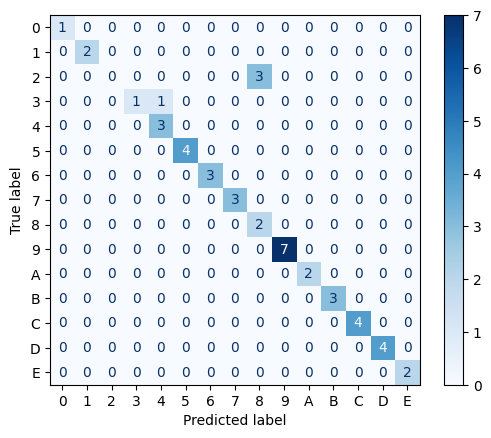

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()
